## Pixel wise operations

In [12]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.util import img_as_float, img_as_ubyte

In [6]:
in_dir = "data/"
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)

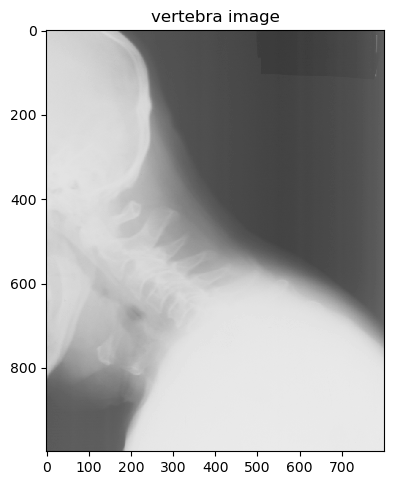

57  --  235
we can expand this by histogram stretching, the new min -- max values would then by 0 -- 255


In [10]:
io.imshow(im_org)
plt.title('vertebra image')
io.show()
print(np.min(im_org), " -- ", np.max(im_org))
print("we can expand this by histogram stretching, the new min -- max values would then by 0 -- 255")

In [19]:
## another data type
print("image as float")
float_img = img_as_float(im_org)
print(float_img)
print(np.min(float_img), " -- ", np.max(float_img))
print("image as ubyte")
ubyte_img = img_as_ubyte(float_img)
print(ubyte_img)
print(np.min(ubyte_img), " -- ", np.max(ubyte_img))

image as float
[[0.82352941 0.82352941 0.82352941 ... 0.38039216 0.38039216 0.38431373]
 [0.83137255 0.82745098 0.82745098 ... 0.38039216 0.38039216 0.38431373]
 [0.83137255 0.82745098 0.83137255 ... 0.37647059 0.38039216 0.38431373]
 ...
 [0.35294118 0.35294118 0.35686275 ... 0.91372549 0.91372549 0.91372549]
 [0.35686275 0.35294118 0.35686275 ... 0.91372549 0.91372549 0.91764706]
 [0.35686275 0.35686275 0.35686275 ... 0.91764706 0.91764706 0.91372549]]
0.22352941176470587  --  0.9215686274509803
image as ubyte
[[210 210 210 ...  97  97  98]
 [212 211 211 ...  97  97  98]
 [212 211 212 ...  96  97  98]
 ...
 [ 90  90  91 ... 233 233 233]
 [ 91  90  91 ... 233 233 234]
 [ 91  91  91 ... 234 234 233]]
57  --  235


In [36]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = max_desired / (max_val - min_val) * (img_float - min_val)
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

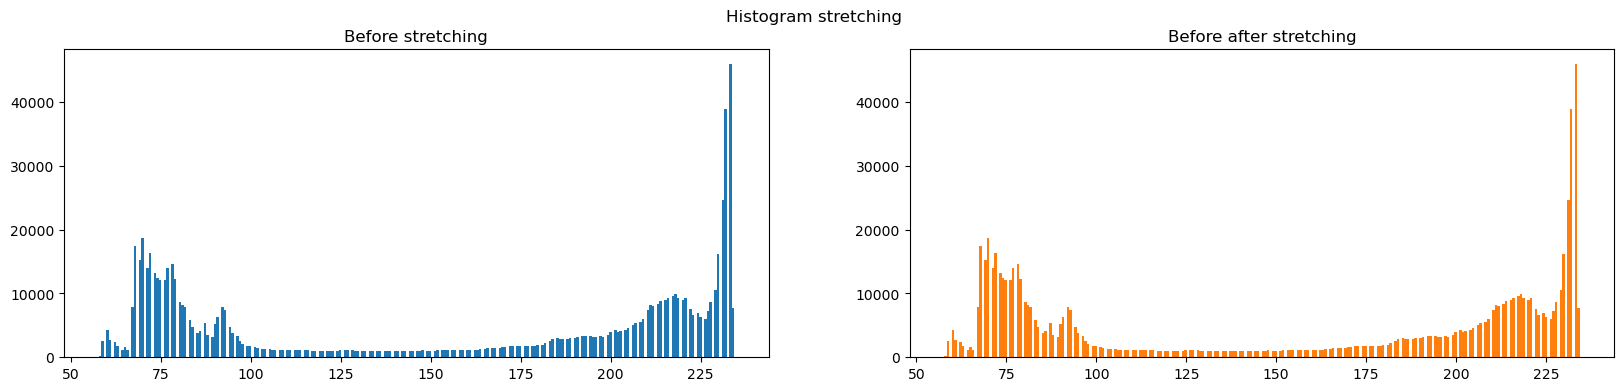

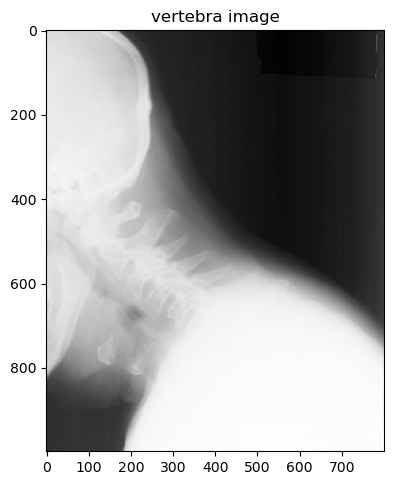

There are 1139.0 pixel values in bin 100


In [45]:
fig, axs  = plt.subplots(1, 2, figsize=(20, 4))
h = plt.hist(im_org.ravel(), bins=256)
plt.suptitle('Histogram stretching')
axs[0].hist(im_org.ravel(), bins=256)
axs[0].set_title("Before stretching")
stretched = histogram_stretch(im_org)
axs[1].hist(im_org.ravel(), bins=256)
axs[1].set_title("Before after stretching")
io.show()
io.imshow(stretched)
plt.title('vertebra image')
io.show()

print(f"There are {count} pixel values in bin {bin_no}")

In [47]:
def gamma_map(img, gamma):
    img_float = img_as_float(img_in)
    gamma = np.pow(img_float, gamma)
    return img_as_ubyte(gamma)